In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [34]:
tablefile_dir = "/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/random"
tablefile_name = "TransientTable.csv"

tablefiles = [os.path.join(tablefile_dir, event_dir, tablefile_name) for event_dir in os.listdir(tablefile_dir) if os.path.exists(os.path.join(tablefile_dir, event_dir, tablefile_name) )]

tablefiles = [os.path.join(tablefile_dir, file) for file in os.listdir(tablefile_dir) if "TransientTable" in file]
print("\n".join(tablefiles))

/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/random/.~lock.TransientTable_814505355.csv#
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/random/.~lock.TransientTable_851514307.csv#
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/random/TransientTable_1007009045.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/random/TransientTable_101132383.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/random/TransientTable_1044458807.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/random/TransientTable_1061164493.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/random/TransientTable_1134040089.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/random/TransientTable_1164221019.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/random/TransientTable_119

In [35]:
all_data = pd.DataFrame()

for file in tablefiles:
    #print(file)
    df_tmp = pd.read_csv(file, sep=";")
    #print(rate_tmp)
    all_data = pd.concat([all_data, df_tmp])

#all_data["map_name"]

In [7]:
alertcount_df = pd.DataFrame()

for map_name in all_data["map_name"].unique():
    #print(map_name)
    temp_df = all_data[all_data["map_name"] == map_name]
    new_temp_df = pd.DataFrame(temp_df[["map_name", "Unfiltered alerts", "Queried alerts", "map_area", "Map dist", "Map dist unc"]]).iloc[[0]]
    
    new_temp_df["Filtered alerts"] = len(temp_df)
    #print(new_temp_df)
    alertcount_df = pd.concat([alertcount_df, new_temp_df])

alertcount_df["Fraction queried"] = alertcount_df["Queried alerts"] / alertcount_df["Unfiltered alerts"]
alertcount_df["Fraction filtered"] = alertcount_df["Filtered alerts"] / alertcount_df["Unfiltered alerts"]


tmp_total_dict = {"Unfiltered": alertcount_df["Unfiltered alerts"].sum(),
                                    "Unfiltered mean": alertcount_df["Unfiltered alerts"].mean(),
                                    "Queried": alertcount_df["Queried alerts"].sum(),
                                    "Queried fraction mean": alertcount_df["Fraction queried"].mean(),
                                    "Filtered": alertcount_df["Filtered alerts"].sum(),
                                    "Filtered fraction mean": alertcount_df["Fraction filtered"].mean(),
                                    "Mean map_area": alertcount_df["map_area"].mean(),
                                    "Mean map dist": alertcount_df["Map dist"].mean(),
                                    "Mean map dist unc": alertcount_df["Map dist unc"].mean()}

total_alertcount_df = pd.DataFrame.from_dict([tmp_total_dict])
total_alertcount_df["Fraction queried"] = total_alertcount_df["Queried"] / total_alertcount_df["Unfiltered"]
total_alertcount_df["Fraction filtered"] = total_alertcount_df["Filtered"] / total_alertcount_df["Unfiltered"]

print(len(alertcount_df))

total_alertcount_df



KeyError: "['Unfiltered alerts', 'Queried alerts', 'Map dist', 'Map dist unc'] not in index"

Index(['Filtered fraction mean', 'Queried fraction mean'], dtype='object')
[ 0.09447778 21.19071651]


[Text(0, 0, '0.0944778'), Text(0, 0, '21.1907')]

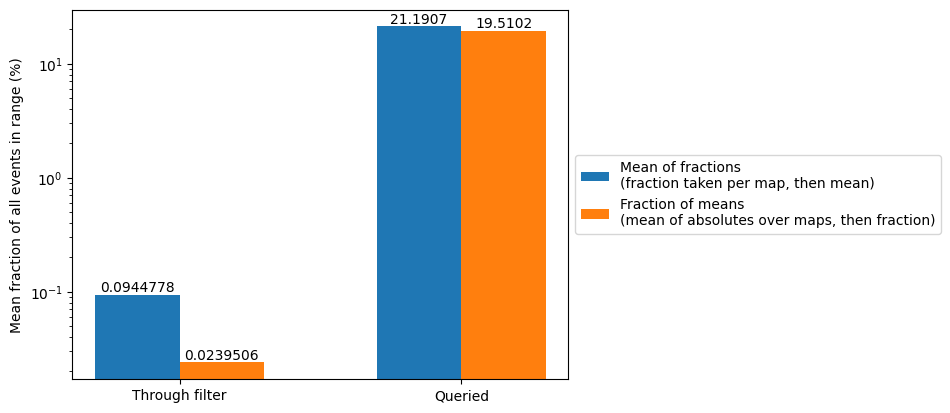

In [5]:
mean_df = total_alertcount_df[["Filtered fraction mean", "Queried fraction mean"]] * 100
total_frac_df = total_alertcount_df[["Fraction filtered", "Fraction queried"]] * 100

print(mean_df.keys())
print(mean_df.values[0])

xes = np.array([0, 1])
offset = 0.3

width = 0.3

xticks = ["Through filter", "Queried"]

rects_1 = plt.bar(xes, mean_df.values[0], label="Mean of fractions \n(fraction taken per map, then mean)", width=width)
rects_2 = plt.bar(xes + offset, total_frac_df.values[0], label="Fraction of means \n(mean of absolutes over maps, then fraction)", width=width)

plt.xticks(xes+width/2, xticks)

plt.yscale("log")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Mean fraction of all events in range (%)")


plt.bar_label(rects_2)
plt.bar_label(rects_1)


In [40]:


rate_df = pd.DataFrame()

for file in tablefiles:
    #print(file)
    if "~lock" in file:
        continue
    df_tmp = pd.read_csv(file, sep=";")
    try:
        df_tmp["kn-1000-rate"] = np.array([np.count_nonzero(df_tmp["kilonovaness"] == kilonovaness) for kilonovaness in df_tmp["kilonovaness"]]) / df_tmp["map_area"] * 1000
    except:
        print(df_tmp, file)

    rate_tmp = np.array([np.count_nonzero(df_tmp["kilonovaness"] == kilonovaness) for kilonovaness in df_tmp["kilonovaness"].unique()]) / df_tmp["map_area"][0] * 1000

    tmp_rate_df = pd.DataFrame({"kilonovaness": df_tmp["kilonovaness"].unique(),"kn-1000-rate": rate_tmp, "map_name": df_tmp["map_name"][0], "Map dist": df_tmp["map_dist"][0]})

    #print(rate_tmp)
    rate_df = pd.concat([rate_df, tmp_rate_df])


rate_df.sort_values(by="kn-1000-rate", ascending=False).head(14)

,kilonovaness,kn-1000-rate,map_name,Map dist
8,3,47.234018,random.fits.gz,115.311487
7,3,39.291834,random.fits.gz,390.256421
6,3,34.889549,random.fits.gz,280.283638
9,1,30.310844,random.fits.gz,390.256421
7,1,13.301641,random.fits.gz,280.283638
5,1,8.116336,random.fits.gz,280.011870
8,1,4.666893,random.fits.gz,1975.495160
3,10,4.116287,random.fits.gz,390.256421
4,3,3.652351,random.fits.gz,280.011870
0,12,3.052836,random.fits.gz,280.283638


/tmp/ipykernel_28565/3526041999.py:85: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


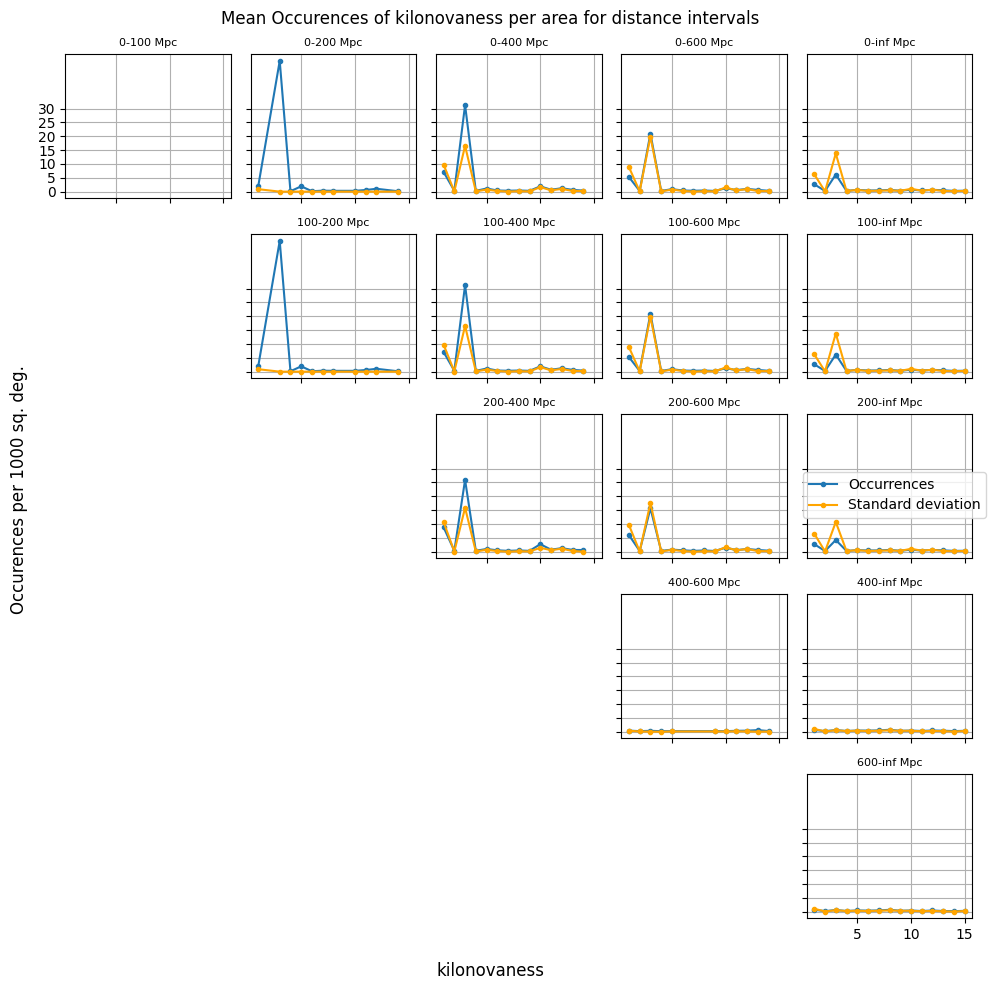

In [41]:
distance_mins = [0, 100, 200, 400, 600]
distance_maxs = [100, 200, 400,600, np.inf]
n = len(distance_mins)
m = len(distance_maxs)

binned_data = np.empty((n, m), dtype=pd.DataFrame)

#print(binned_data)

for k in range(n):
    for j in range(k, m):

        dist_min = distance_mins[k]
        dist_max = distance_maxs[j]
        #print(f"From {dist_min} to {dist_max} Mpc")


        kilonovaness_rate = pd.DataFrame(columns=["kilonovaness", "rate-1000", "std-1000", "entries"])
        #print(kilonovaness_rate.head())
        #print(data["kilonovaness"].unique())

        
        lim_data = rate_df.copy()[np.logical_and(rate_df["Map dist"] >= dist_min, rate_df["Map dist"] < dist_max)]

        #print(dist_min, dist_max, len(lim_data))
        for kilonovaness in lim_data["kilonovaness"].unique():
            #print(kilonovaness)
            tmp = lim_data.copy()[lim_data["kilonovaness"] == kilonovaness]

            #print(tmp)

            data_dict = {"kilonovaness": [kilonovaness], "rate-1000": [np.mean(tmp["kn-1000-rate"].values)], "std-1000": [np.std(tmp["kn-1000-rate"].values)], "entries":[len(tmp["kn-1000-rate"].values)]}
            #print(data_dict)
            mini_tmp = pd.DataFrame.from_dict(data_dict)

            kilonovaness_rate = pd.concat([kilonovaness_rate, mini_tmp])
            kilonovaness_rate = kilonovaness_rate.sort_values(by=["kilonovaness"], ascending=True)
        
        #print("kilonovaness rate", kilonovaness_rate)
        binned_data[k, j] = kilonovaness_rate
        
        # print(kilonovaness_rate)

#print(kilonovaness_rate.head(5))

#print(binned_data)

fig, axs = plt.subplots(ncols=m, nrows=n, figsize=(10, 10),
                        layout="constrained", sharex=True, sharey=True, subplot_kw={"xticks": [0, 5, 10, 15, 20, 25], })#"yticks": [0, 5, 10, 15, 20,25, 30]})
# fill plots
for row in range(n):
    ind_1 = row
    for col in range(m):

        ind_2 = col
        if (binned_data[row, col] is not None):
            #print(), 20, 25
            axs[ind_1, ind_2].plot(binned_data[row, col]["kilonovaness"], binned_data[row, col]["rate-1000"], marker=".", label="Occurrences")
            #secax_x2 = axs[-row-1, -col-1].twinx()
            axs[ind_1, ind_2].plot(binned_data[row, col]["kilonovaness"], binned_data[row, col]["std-1000"], marker=".", color="orange", label="Standard deviation")
            #secax_x2.plot(binned_data[row, col]["kilonovaness"], binned_data[row, col]["std-1000"], marker=".", color="orange")
            axs[ind_1, ind_2].set_title(f"{distance_mins[row]}-{distance_maxs[col]} Mpc", fontsize=8)
            axs[ind_1, ind_2].grid()
        else:
            axs[ind_1, ind_2].set_visible(False)
        #pass

handles, labels = axs[row, col].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')

fig.suptitle('Mean Occurences of kilonovaness per area for distance intervals')
fig.supxlabel("kilonovaness")
fig.supylabel("Occurences per 1000 sq. deg.", ha="left")

# dummy axes 2 for right ylabel
# ax = fig.add_subplot(1, 1, 1)
# ax.set_xticks([])
# ax.set_yticks([])
# [ax.spines[side].set_visible(False) for side in ('left', 'top', 'right', 'bottom')]
# ax.patch.set_visible(False)
# ax.yaxis.set_label_position('right')
# ax.set_ylabel('Standard deviation', labelpad=30, fontsize=12)


fig.tight_layout()
plt.show()


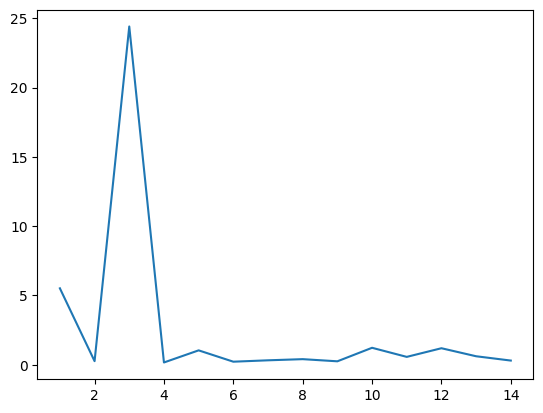

In [11]:
plt.plot(kilonovaness_rate["kilonovaness"], kilonovaness_rate["rate-1000"])

In [7]:
dist_min = 100
dist_max = 600
#print(f"From {dist_min} to {dist_max} Mpc")


kilonovaness_rate = pd.DataFrame(columns=["kilonovaness", "rate-1000", "std-1000", "entries"])
#print(kilonovaness_rate.head())
#print(data["kilonovaness"].unique())

lim_data = rate_df[np.logical_and(rate_df["Map dist"] >= dist_min, rate_df["Map dist"] < dist_max)]

lim_data.head()


for kilonovaness in lim_data["kilonovaness"].unique()[:]:
    print("KILONVANESS:", kilonovaness)
    tmp = lim_data[lim_data["kilonovaness"] == kilonovaness]
    print(tmp)

    print(tmp["kn-1000-rate"])
    print(tmp["kilonovaness"])

    data_dict = {"kilonovaness": [kilonovaness], "rate-1000": [np.mean(tmp["kn-1000-rate"].values)], "std-1000": [np.std(tmp["kn-1000-rate"].values)], "entries":[len(tmp["kn-1000-rate"].values)]}
    print(data_dict)
    mini_tmp = pd.DataFrame.from_dict(data_dict)

    kilonovaness_rate = pd.concat([kilonovaness_rate, mini_tmp])
    kilonovaness_rate = kilonovaness_rate.sort_values(by=["kilonovaness"], ascending=True)
    print()

lim_data.head(20)

print(kilonovaness_rate)

KILONVANESS: 12
   kilonovaness  kn-1000-rate        map_name    Map dist
0            12      0.468532  random.fits.gz  482.681102
1            12      1.033244  random.fits.gz  115.311487
2            12      0.290038  random.fits.gz  434.512218
0            12      3.052836  random.fits.gz  280.283638
1            12      1.122624  random.fits.gz  390.256421
0    0.468532
1    1.033244
2    0.290038
0    3.052836
1    1.122624
Name: kn-1000-rate, dtype: float64
0    12
1    12
2    12
0    12
1    12
Name: kilonovaness, dtype: int64
{'kilonovaness': [12], 'rate-1000': [1.1934549001208088], 'std-1000': [0.9828178518908508], 'entries': [5]}

KILONVANESS: 11
   kilonovaness  kn-1000-rate        map_name    Map dist
1            11      0.468532  random.fits.gz  482.681102
0            11      0.239831  random.fits.gz  369.081928
2            11      0.590425  random.fits.gz  115.311487
1            11      0.436119  random.fits.gz  280.283638
1            11      0.183079  random.fits.